No shift: True
Running {'topology': 'E3', 'Lx': 1, 'Ly': 1, 'Lz': 1, 'alpha_x': 0.5, 'alpha_y': 0.5, 'alpha_z': 0.5, 'x0': array([0., 0., 0.]), 'beta': 90, 'alpha': 90, 'c_l_accuracy': 0.99, 'l_max': 10, 'do_polarization': True, 'number_of_a_lm_realizations': 1, 'l_min': 2, 'gamma': 0}
Shape of transfer function from CAMB: (3, 159, 2853)

Finding k_max as a function of ell


100%|██████████| 9/9 [00:00<00:00, 21.02it/s]


Done. k_max for ell_max = 0.014031408427903088
Eigenmode 1: 122
Eigenmode 2: 986234
E3 Final num of elements: 986234 Minimum k_amp 0.0002272416186438812 n_x_max 62 n_z_max 247
Size of tilde xi: 60.19 MB.
Shape tilde xi: (986234, 4) 

Time to get list of k, phi, theta: 4.555636644363403 seconds
Getting repeated theta and k elements
Ratio of unique theta: 0.30676289805461987
Ratio of unique |k|: 0.014792635419180437
Time to get unique k and theta: 0.16720199584960938 seconds

Getting transfer functions


100%|██████████| 14589/14589 [00:00<00:00, 49703.32it/s]


Size of transfer function: 1.22 MB. 


Getting transfer functions


100%|██████████| 14589/14589 [00:00<00:00, 45533.81it/s]


Size of transfer function: 1.22 MB. 


Getting spherical harmonics


100%|██████████| 302540/302540 [00:05<00:00, 51518.63it/s]


The spherical harmonics array is 76.17 MB 


**************
Done with all preprocessing
**************
Time to pre-process with l_max=10 and accuracy=0.99: 17.65 seconds

Calculating covariance matrix
Size of integrand: 20.2 MB
Time to get Correlation functions: 0:0:7


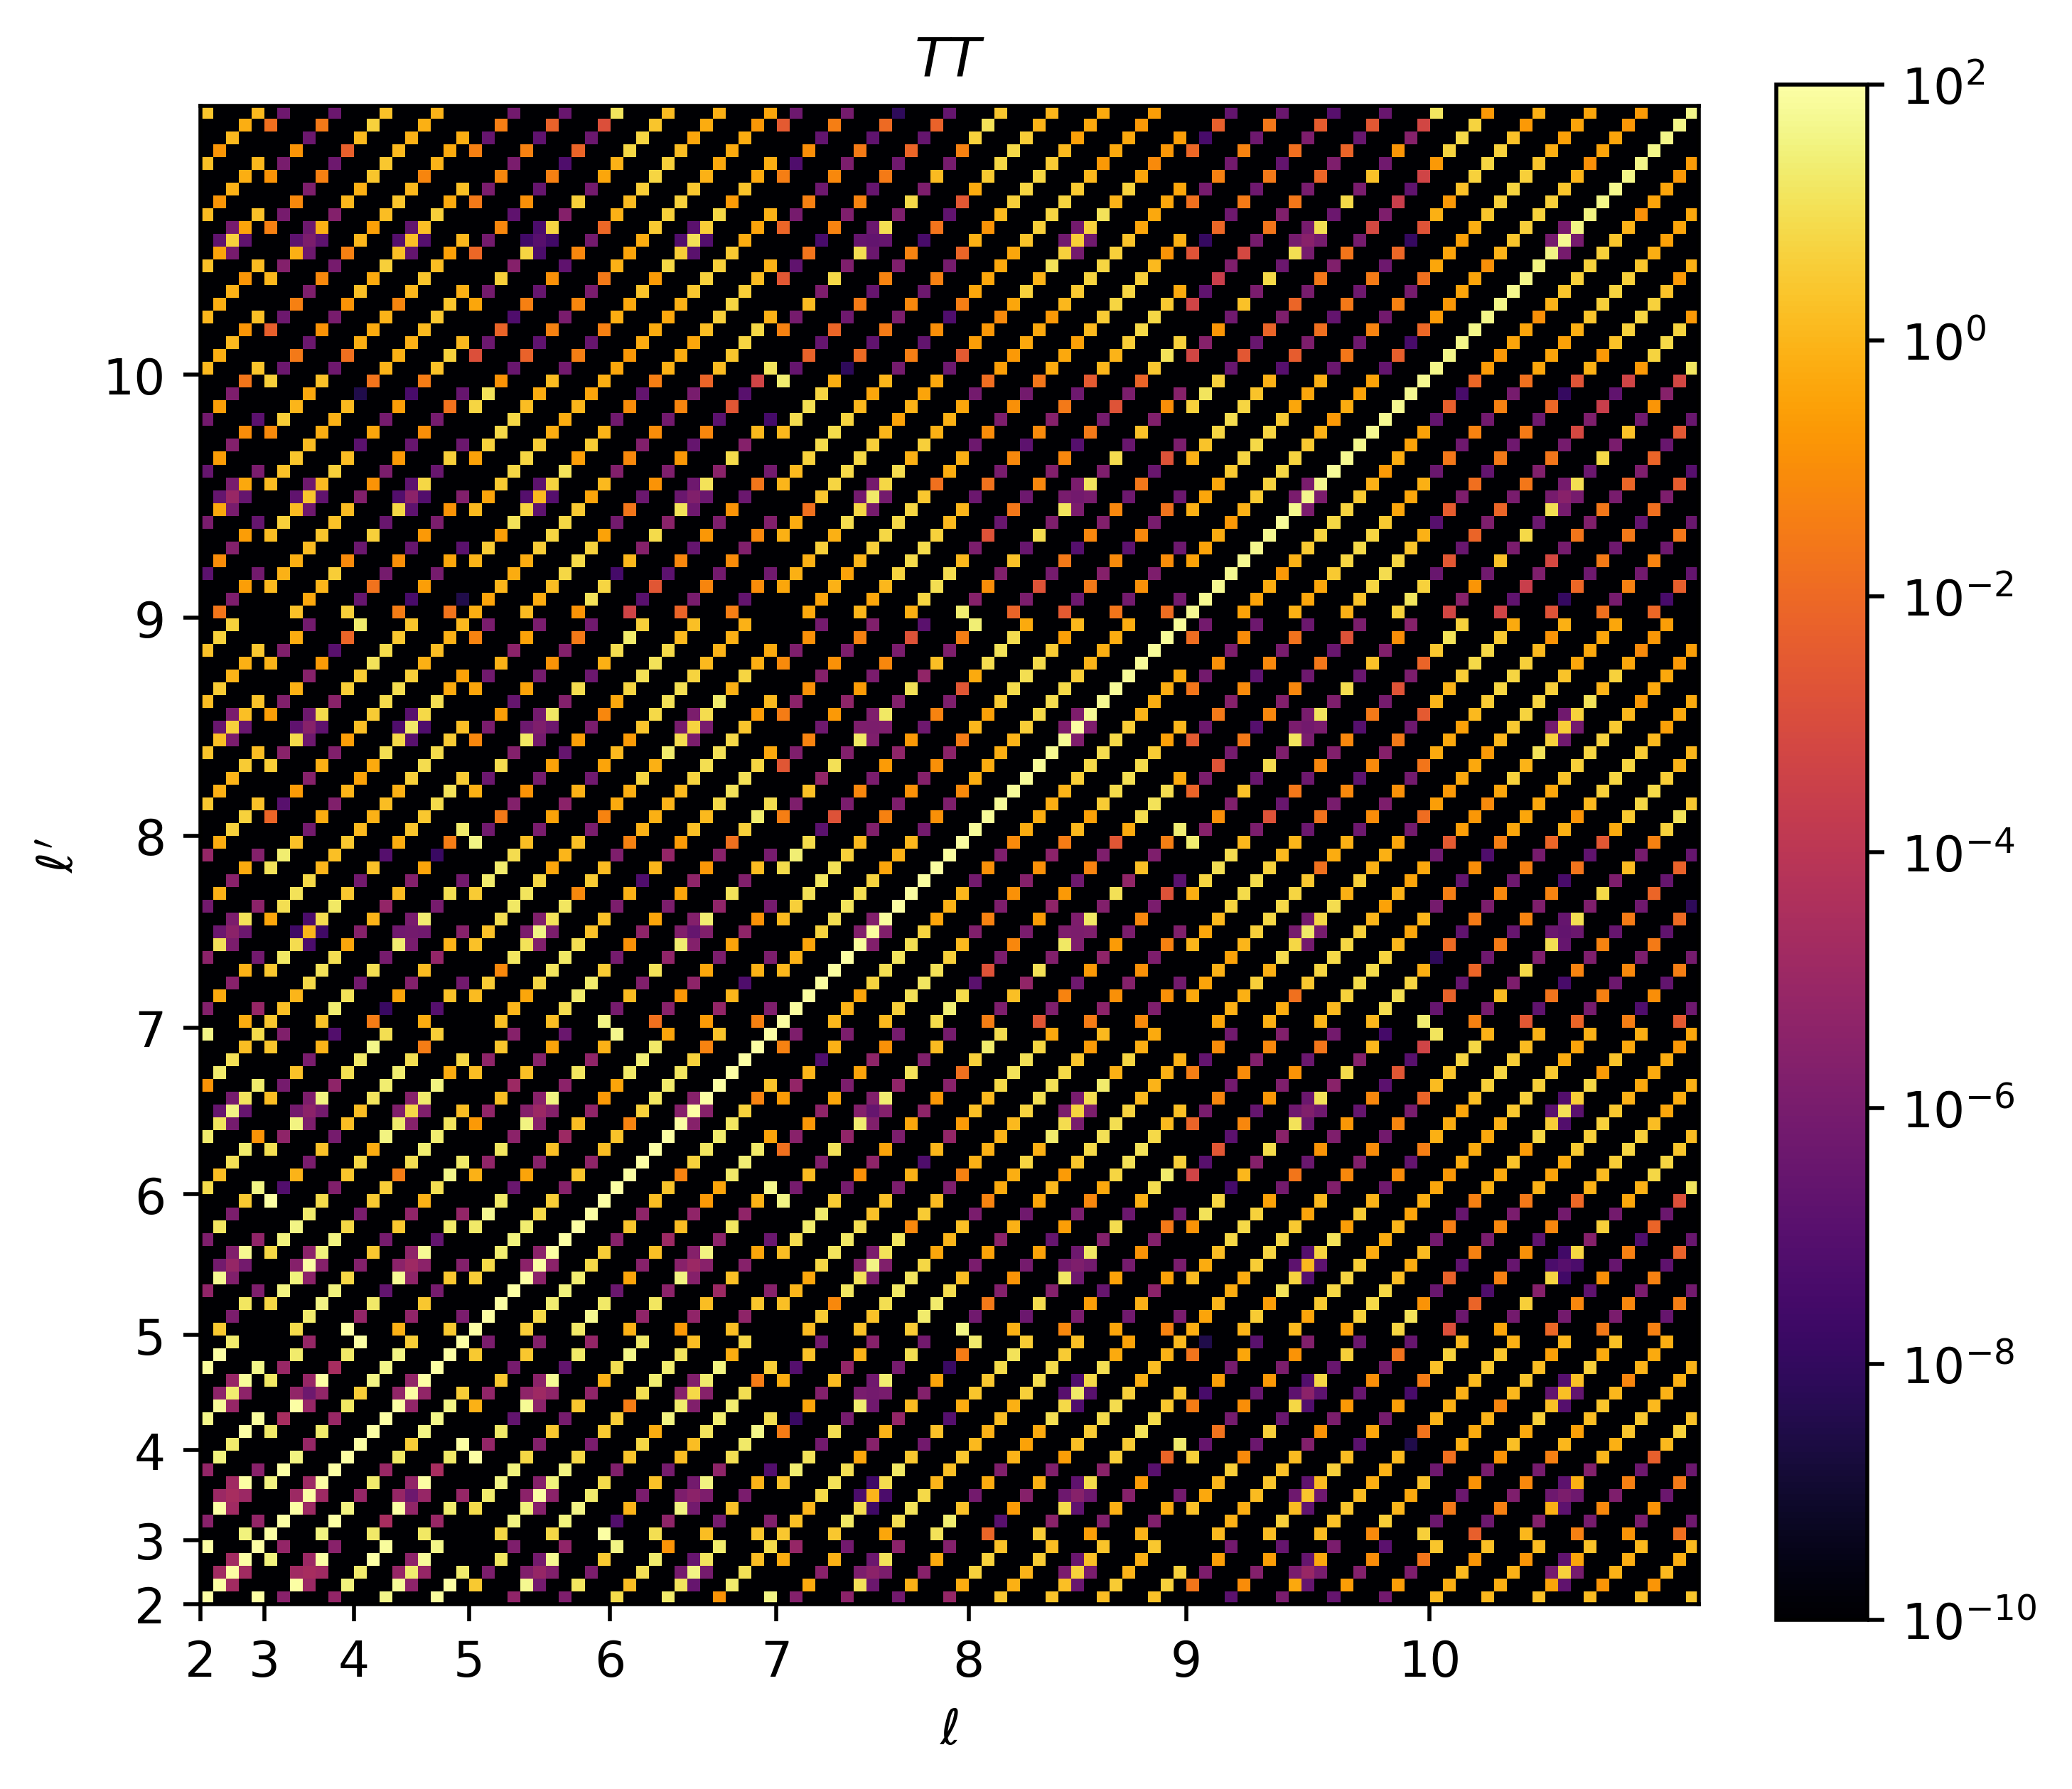

In [1]:
import sys
from cmb_topology_scalar.E1 import E1
from cmb_topology_scalar.E2 import E2
from cmb_topology_scalar.E3 import E3
from cmb_topology_scalar.E4 import E4
from cmb_topology_scalar.E5 import E5
from cmb_topology_scalar.E6 import E6
import numpy as np
import time
import parameter_files.default_E6 as parameter_file
import matplotlib.pyplot as plt

def run_topology(topology, Lx, Ly, Lz, l_max, l_min = 2, beta = 90, alpha=90, gamma=0, 
                 x0 = np.array([0.0, 0.0, 0.0]), l_range= np.array([[2,2]]), 
                 lp_range= np.array([[2,2]])):
    param = parameter_file.parameter
    param['topology'] = topology
    param['Lx'] = Lx
    param['Ly'] = Ly
    param['Lz'] = Lz
    param['l_max'] = l_max
    param['l_min'] = l_min
    param['beta'] = beta
    param['alpha'] = alpha
    param['gamma'] = gamma
    param['x0'] = x0
    param['do_polarization'] = True

    if param['topology'] == 'E1':
        a = E1(param=param, make_run_folder=True)
    elif param['topology'] == 'E2':
        a = E2(param=param, make_run_folder=True)
    elif param['topology'] == 'E3':
        a = E3(param=param, make_run_folder=True)
    elif param['topology'] == 'E4':
        a = E4(param=param, make_run_folder=True)
    elif param['topology'] == 'E5':
        a = E5(param=param, make_run_folder=True)
    elif param['topology'] == 'E6':
        a = E6(param=param, make_run_folder=True)
    else:
        exit()

    C_lmlpmp = a.calculate_c_lmlpmp(
        normalize = False,
        plot_param={
        'l_ranges':l_range,
        'lp_ranges': lp_range,
        }
    )
    a.plot_cov_matrix(normalize = False, C_l_type = 0)
  


l_max = 10
C_lmlpmp = run_topology(topology = 'E3', Lx = 1, Ly = 1, Lz = 1, l_max = l_max, 
             beta = 90, alpha=90, gamma=0, x0= np.array([0.0, 0.0, 0.0], 
            dtype=np.float64), l_range = np.array([[2,l_max]]), 
            lp_range = np.array([[2,l_max]]))

In [3]:
c_1 = np.load('runs/E1_Lx_1.00_Ly_1.00_Lz_1.00_beta_90_alpha_90_l_max_10_accuracy_99_percent_7/TT_corr_matrix_l_2_10_lp_2_10.npy')
c_2 = np.load('runs/E1_Lx_1.00_Ly_1.00_Lz_1.00_beta_90_alpha_90_l_max_10_accuracy_99_percent_14/TT_corr_matrix_l_2_10_lp_2_10.npy')

In [4]:
l_max = 10
a_tol = 1e-10
for l in range(2, l_max + 1):
    for l_p in range(2, l_max+1):
        for m in range(-l, l + 1):
          lm_index = l * (l+1) + m - 4 # l**2 + l +m - l_min**2
          for m_p in range(-l_p, l_p+1):
            lm_p_index = l_p * (l_p+1) + m_p  - 4
            if np.abs(c_1[lm_index, lm_p_index] - c_2[lm_index, lm_p_index]) > a_tol:
               print(f"ell m, ell' m'= {l, m, l_p, m_p}")
               print(c_1[lm_index, lm_p_index])
               print(c_2[lm_index, lm_p_index])

ell m, ell' m'= (2, -2, 2, -2)
(958.0522988431443+0j)
(957.8796523849761+0j)
ell m, ell' m'= (2, -2, 2, 2)
(415.85894159681334-8.07318910981761e-14j)
(415.60378594313835-9.110705941207609e-14j)
ell m, ell' m'= (2, -1, 2, -1)
(542.1933657133995+0j)
(542.2758608575818+0j)
ell m, ell' m'= (2, 0, 2, 0)
(1373.911318414982+0j)
(1373.4835480493023+0j)
ell m, ell' m'= (2, 1, 2, 1)
(542.1933657133995+0j)
(542.2758608575818+0j)
ell m, ell' m'= (2, 2, 2, -2)
(415.85894159681334+8.07318910981761e-14j)
(415.60378594313835+9.110705941207609e-14j)
ell m, ell' m'= (2, 2, 2, 2)
(958.0522988431443+0j)
(957.8796523849761+0j)
ell m, ell' m'= (2, -2, 3, -2)
(-5.760275086012966e-17+3.2353857027816404e-05j)
(-8.79133900794149e-19-3.4126778554351953e-12j)
ell m, ell' m'= (2, -2, 3, 2)
(-2.6812378016351727e-16-1.661092167498641e-05j)
(-3.798319074781013e-17+1.6292939792304617e-12j)
ell m, ell' m'= (2, -1, 3, -1)
(1.454590572251631e-16-2.678945656100291e-05j)
(9.154097576233554e-19+2.236994778863976e-12j)
ell m

Running - E7 l_max=5_LAx_27649_LAy_0_L1y_38709_L2x_0_L2z_27649_x_0.00_y_0.00_z_0.00
Running {'topology': 'E7', 'LAx': 1, 'LAy': 0, 'L1y': 1.4, 'L2x': 0.0, 'L2z': 1, 'do_polarization': False, 'c_l_accuracy': 0.99, 'x0': array([0., 0., 0.]), 'l_max': 5, 'l_min': 2}
Making run folder: runs/E7_LAx_1.00_LAy_0.00_L1y_1.40_L2x_0.00_L2z_1.00_x_0.00_y_0.00_z_0.00_l_max_5/
Shape of transfer function from CAMB: (3, 154, 2853)

Finding k_max as a function of ell


100%|██████████| 4/4 [00:00<00:00, 30.15it/s]

Done. k_max for ell_max = 0.009000463773865593
Eigenmode 2: 4
E7 Final num of elements: 4 Minimum k_amp 0.000872888923846642 n_x_max 80 n_z_max 80
Time to get list of k, phi, theta: 0.05761528015136719 seconds
Getting repeated theta and k elements
Ratio of unique theta: 0.5
Ratio of unique |k|: 0.25
Time to get unique k and theta: 0.00021529197692871094 seconds



Getting transfer functions


100%|██████████| 1/1 [00:00<00:00, 132.92it/s]

Size of transfer function: 0.0 MB. 




Getting spherical harmonics


100%|██████████| 2/2 [00:00<00:00, 642.07it/s]

The spherical harmonics array is 0.0 MB 


**************
Done with all preprocessing
**************
Time to pre-process with l_max=5 and accuracy=0.99: 6.44 seconds

Calculating covariance matrix
Size of integrand: 0.0 MB


Time to get Correlation functions: 0:0:1


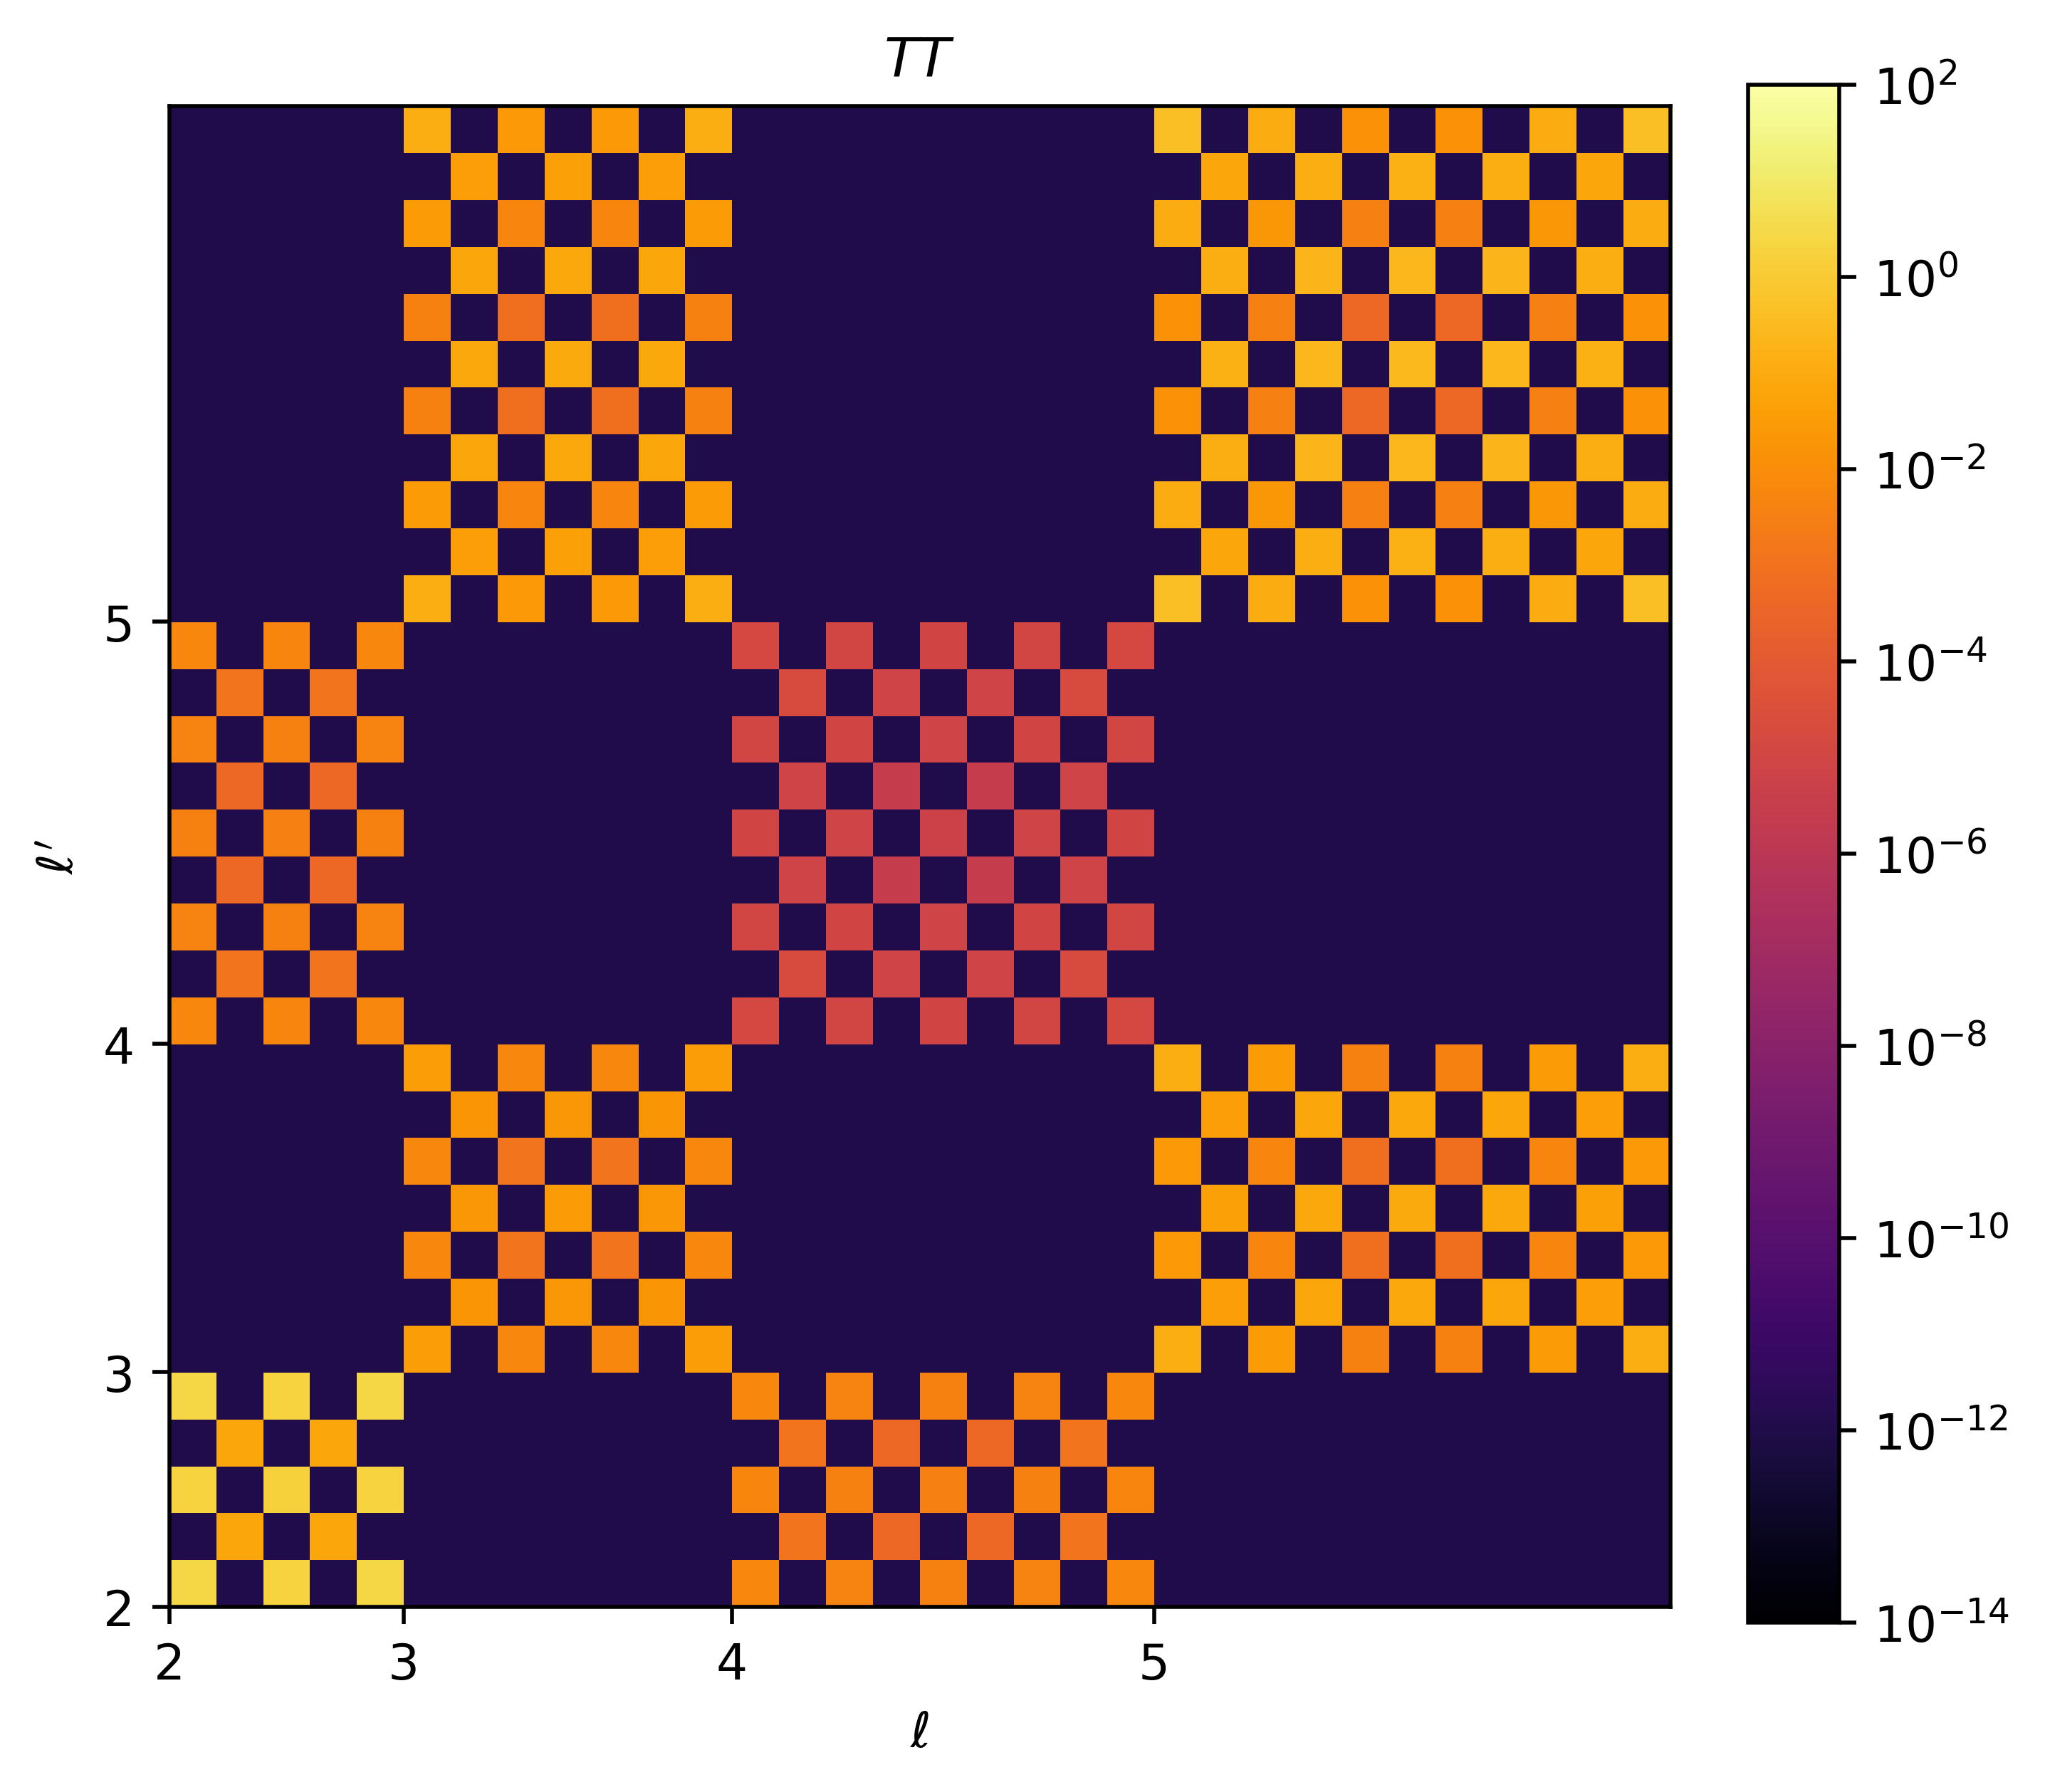

In [9]:
import sys
from src.E7 import E7
from src.E9 import E9
import numpy as np
import time
import parameter_files.default_E7 as parameter_file

# Set parameter file
#import parameter_files.default as parameter_file
def run_topology(topology, LAx, LAy, L1y, L2x, L2z, l_max, l_min = 2, x0 = np.array([0.0, 0.0, 0.0]), l_range= np.array([[2,2]]), lp_range= np.array([[2,2]])):
  param = parameter_file.parameter
  param['topology'] = topology
  param['LAx'] = LAx
  param['LAy'] = LAy
  param['L1y'] = L1y
  param['L2x'] = L2x
  param['L2z'] = L2z
  param['l_max'] = l_max
  param['l_min'] = l_min
  param['x0'] = x0
  param['do_polarization'] = False

  if param['topology'] == 'E7':
    a = E7(param=param, make_run_folder=True)
  elif param['topology'] == 'E9':
    a = E9(param=param, make_run_folder=True)
  else:
    exit()

  c = a.calculate_c_lmlpmp(
    normalize = False,
    plot_param={
      'l_ranges':l_range,
      'lp_ranges': lp_range,
    }
  )
  a.plot_cov_matrix(normalize = False, C_l_type = 0)
  return c


l_max = 5
L_circle = 0.73321
c_ell = run_topology(topology = 'E7', LAx = 1, LAy = 0, L1y = 1.4, L2x = 0.0, L2z = 1, 
             l_max = l_max, x0= np.array([0.0, 0.0, 0.0], dtype=np.float64), 
             l_range = np.array([[2,l_max]]), lp_range = np.array([[2,l_max]]))

In [ ]:
l = 2
m= 2
l_p = 3
m_p = 2
lm_p_index = l_p * (l_p+1) + m_p  - 4
lm_index = l * (l+1) + m - 4
c_ell[lm_index, lm_p_index]


np.complex128(4.222951665490349e-17-4.002264104557525e-17j)

Running - E8 l_max=5_LAx_27649_LAy_13824_LBx_0_LBz_27649_LCy_38709_x_0.00_y_0.00_z_0.00
Running {'topology': 'E8', 'LAx': 1, 'LAy': 0.5, 'LBx': 0.0, 'LBz': 1.0, 'LCy': 1.4, 'do_polarization': False, 'c_l_accuracy': 0.99, 'x0': array([0., 0., 0.]), 'l_max': 5, 'l_min': 2}
Making run folder: runs/E8_LAx_1.00_LAy_0.50_LBx_0.00_LBz_1.00_LCy_1.40_x_0.00_y_0.00_z_0.00_l_max_5/
Shape of transfer function from CAMB: (3, 154, 2853)

Finding k_max as a function of ell


100%|██████████| 4/4 [00:00<00:00, 27.73it/s]

Done. k_max for ell_max = 0.009000463773865593


Eigenmode 1: 4851
Eigenmode 2: 8264
Eigenmode 3: 8342
Eigenmode 4: 364341
E8 Final num of elements: 364341 Minimum k_amp 0.00016231544188848658 n_x_max 80 n_z_max 80
Time to get list of k, phi, theta: 4.035049200057983 seconds
Getting repeated theta and k elements
Ratio of unique theta: 0.7976565909409042
Ratio of unique |k|: 0.1478944175923105
Time to get unique k and theta: 0.05803656578063965 seconds

Getting transfer functions


100%|██████████| 53884/53884 [00:00<00:00, 71562.70it/s]


Size of transfer function: 2.47 MB. 


Getting spherical harmonics


100%|██████████| 290619/290619 [00:06<00:00, 46642.34it/s]


The spherical harmonics array is 23.28 MB 


**************
Done with all preprocessing
**************
Time to pre-process with l_max=5 and accuracy=0.99: 19.09 seconds

Calculating covariance matrix
Size of integrand: 14.8 MB
Time to get Correlation functions: 0:0:2


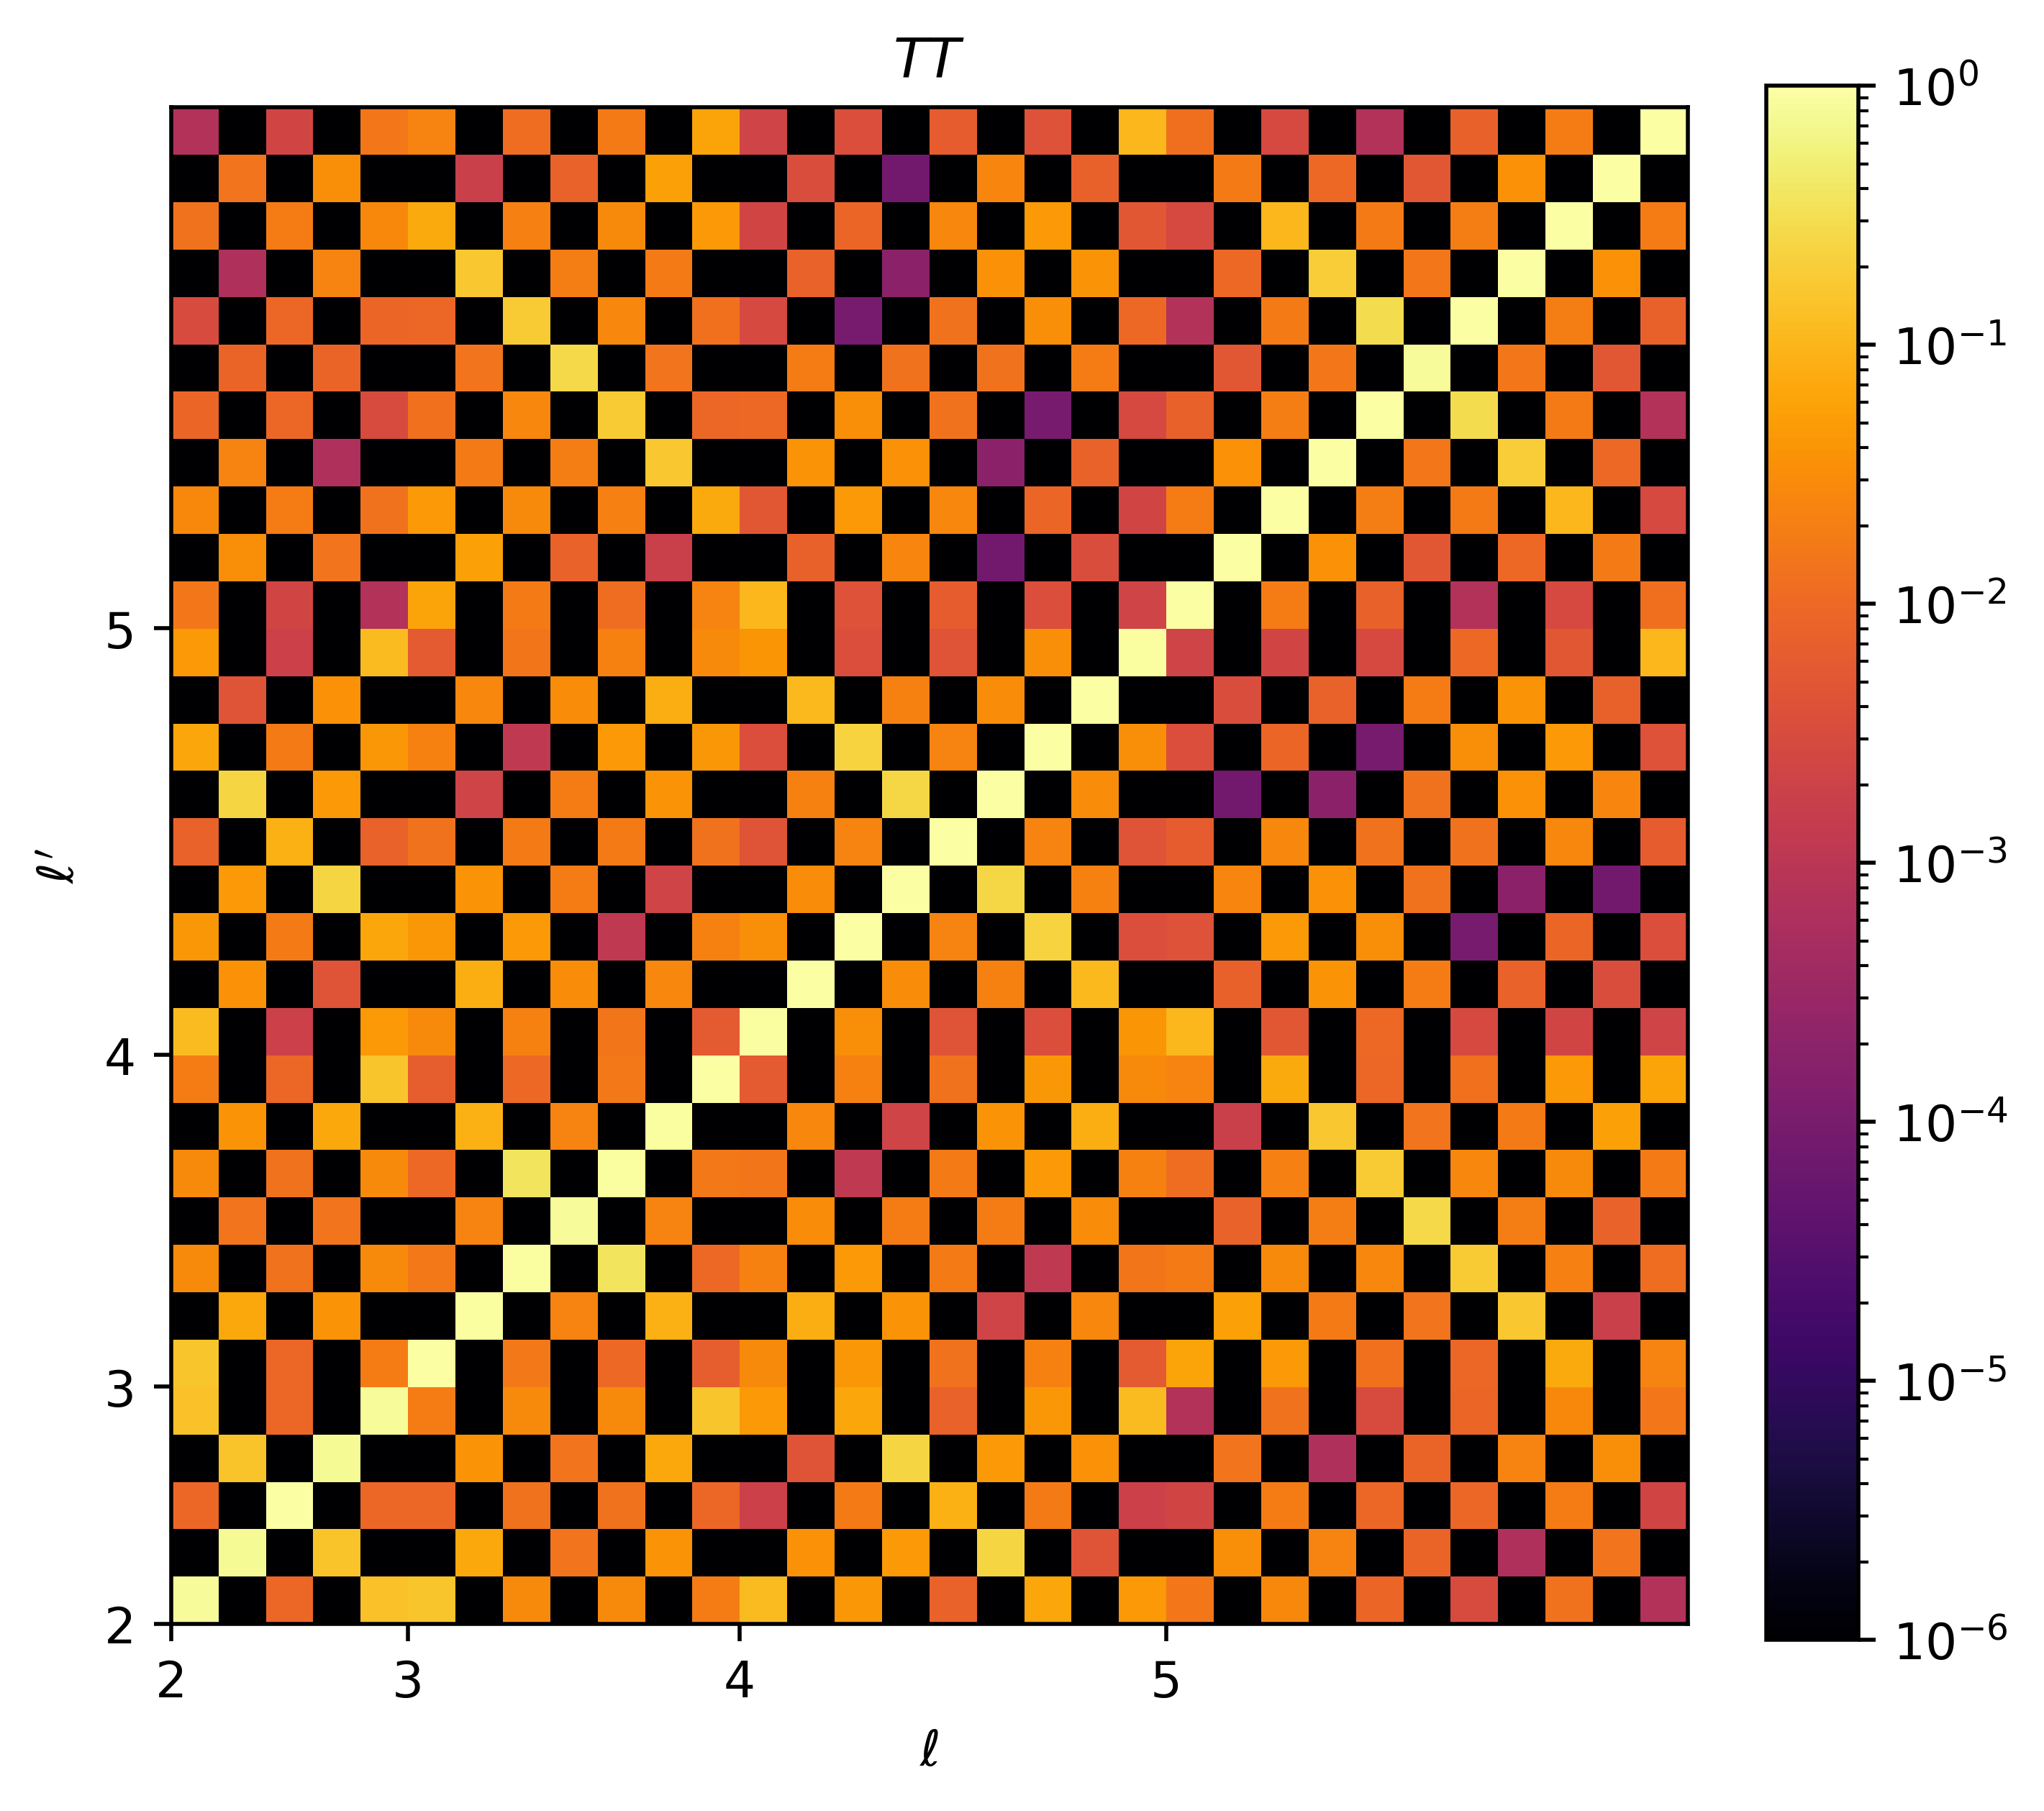

In [8]:
import sys
from src.E10 import E10
from src.E8 import E8
import numpy as np
import time
import parameter_files.default_E10 as parameter_file

# Set parameter file
#import parameter_files.default as parameter_file
def run_topology(topology, LAx, LAy, LBx, LBz, LCy, l_max, l_min = 2, x0 = np.array([0.0, 0.0, 0.0]), l_range= np.array([[2,2]]), lp_range= np.array([[2,2]])):
  param = parameter_file.parameter
  param['topology'] = topology
  param['LAx'] = LAx
  param['LAy'] = LAy
  param['LBx'] = LBx
  param['LBz'] = LBz
  param['LCy'] = LCy
  param['l_max'] = l_max
  param['l_min'] = l_min
  param['x0'] = x0
  param['do_polarization'] = False

  if param['topology'] == 'E10':
    a = E10(param=param, make_run_folder=True)
  elif param['topology'] == 'E8':
    a = E8(param=param, make_run_folder=True)
  else:
    exit()

  # Plot the diagonal power spectrum and the realizations
  # Good to see if there are any obvious bugs
  a.calculate_c_lmlpmp(
    normalize = True,
    plot_param={
      'l_ranges':l_range,
      'lp_ranges': lp_range,
    }
  )
  a.plot_cov_matrix(normalize = True, C_l_type = 0)



l_max = 5



# off-axis
L_circle = 0.73321
# run_topology(topology = 'E8', LAx = 1, LAy = 0, LBx = 0.7, LBz = 1., LCy = 1.4, 
#              l_max = l_max, x0= np.array([0.0, 0.0, 0.0], dtype=np.float64), 
#              l_range = np.array([[2,l_max]]), lp_range = np.array([[2,l_max]]))

run_topology(topology = 'E8', LAx = 1, LAy = 0.5, LBx = 0.0, LBz = 1., LCy = 1.4, 
             l_max = l_max, x0= np.array([0.0, 0.0, 0.0], dtype=np.float64), 
             l_range = np.array([[2,l_max]]), lp_range = np.array([[2,l_max]]))

In [3]:
from src.tools import calculate_kl_divergence
import numpy as np
c_E10_1 = np.load('runs/E10_LAx_1.00_LAy_0.00_LBx_0.00_LBz_1.00_LCy_1.40_x_-0.40_y_0.30_z_0.00_l_max_10/norm_full_corr_matrix_l_2_10_lp_2_10.npy')
c_E10_2 = np.load('runs/E10_LAx_1.00_LAy_0.00_LBx_1.00_LBz_1.00_LCy_1.40_x_0.10_y_0.30_z_0.00_l_max_10/norm_full_corr_matrix_l_2_10_lp_2_10.npy')
np.allclose(c_E10_1.imag, c_E10_2.imag, rtol=1e-12, atol=1e-12)

True

In [18]:
calculate_kl_divergence(c_E10_2)

(np.float64(2.1765383934661404), np.float64(1.5659781704240652))

In [19]:
calculate_kl_divergence(c_E10_1)

(np.float64(2.1765383934661395), np.float64(1.5659781704240634))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rcParams.update({
    'text.usetex': True,  # Use LaTeX for text rendering
    'font.family': 'serif',  # Use a serif font family
    'font.serif': ['Times New Roman'],  # Example font (Times New Roman)
    'font.size': 11,  # Base font size
    'axes.titlesize': 11,  # Title font size
    'axes.labelsize': 11,  # Axis labels font size
    'xtick.labelsize':11,  # X-axis tick labels font size
    'ytick.labelsize':11,  # Y-axis tick labels font size
    'legend.fontsize':11,  # Legend font size
})

kl_E3_TT_vs_lmax = np.load('scalar_TT_kl_E3_off_1.1_lmax_10_50.npy')
kl_E3_TE_vs_lmax = np.load('scalar_TE_kl_E3_off_1.1_lmax_10_50.npy')
fig, ax = plt.subplots()
x_axis = [10, 20, 30, 40, 50]
ax.plot(x_axis, kl_E3_TT_vs_lmax[:, 0], marker= 'o', label='$\\ TT, \\ L_B/L_{\\rm{circle}} = 1.1$')
ax.plot(x_axis, kl_E3_TE_vs_lmax[:, 0], marker= 'o', label='$\\ T \\ and \\ E, \\ L_B/L_{\\rm{circle}} = 1.1$')
ax.axhline(y=1, color= 'black', linestyle='--')
ax.set_xticks(x_axis)
ax.tick_params(axis='both', which='major')
ax.set_xlabel('$\\ell_{\\rm{max}}$')
ax.set_ylabel('$D_{\\rm{KL}}(p||q)$')
ax.set_title('Scalar Correlations')
ax.grid(True)
ax.legend()
#ax.set_title(f'$E$-mode and $B$-mode')
ax.set_yscale('log')

plt.tight_layout()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rcParams.update({
    'text.usetex': True,  # Use LaTeX for text rendering
    'font.family': 'serif',  # Use a serif font family
    'font.serif': ['Times New Roman'],  # Example font (Times New Roman)
    'font.size': 11,  # Base font size
    'axes.titlesize': 11,  # Title font size
    'axes.labelsize': 11,  # Axis labels font size
    'xtick.labelsize':11,  # X-axis tick labels font size
    'ytick.labelsize':11,  # Y-axis tick labels font size
    'legend.fontsize':11,  # Legend font size
})

kl_E3_TT_vs_lmax = np.load('scalar_TT_kl_E3_off_1.1_lmax_10_50_2.npy')
kl_E3_TE_vs_lmax = np.load('scalar_TE_kl_E3_off_1.1_lmax_10_50_2.npy')
fig, ax = plt.subplots()
x_axis = [10, 20, 30, 40]
ax.plot(x_axis, kl_E3_TT_vs_lmax[:, 0], marker= 'o', label='$\\ TT, \\ L_B/L_{\\rm{circle}} = 1.1$')
ax.plot(x_axis, kl_E3_TE_vs_lmax[:, 0], marker= 'o', label='$\\ T \\ and \\ E, \\ L_B/L_{\\rm{circle}} = 1.1$')
ax.axhline(y=1, color= 'black', linestyle='--')
ax.set_xticks(x_axis)
ax.tick_params(axis='both', which='major')
ax.set_xlabel('$\\ell_{\\rm{max}}$')
ax.set_ylabel('$D_{\\rm{KL}}(p||q)$')
ax.set_title('Scalar Correlations')
ax.grid(True)
ax.legend()
#ax.set_title(f'$E$-mode and $B$-mode')
ax.set_yscale('log')

plt.tight_layout()